In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from scipy import stats
from scipy.stats import mstats
from scipy.spatial.distance import cdist
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv('weight_change_dataset.csv')
df.shape

(100, 13)

In [36]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [38]:
df.isnull().sum()

,0
Participant ID,0
Age,0
Gender,0
Current Weight (lbs),0
BMR (Calories),0
Daily Calories Consumed,0
Daily Caloric Surplus/Deficit,0
Weight Change (lbs),0
Duration (weeks),0
Physical Activity Level,0


In [39]:
df.duplicated().sum()

0

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participant ID,100.0,50.500000,29.011492,1.000000,25.750000,50.50,75.250,100.0
Age,100.0,37.910000,12.219454,18.000000,26.750000,38.00,46.250,59.0
Current Weight (lbs),100.0,171.533000,30.333856,100.000000,153.650000,172.15,192.475,238.2
BMR (Calories),100.0,2518.206000,364.431221,1566.500000,2255.050000,2519.50,2805.975,3390.8
Daily Calories Consumed,100.0,3518.292000,513.313097,2030.900000,3233.300000,3636.05,4000.000,4000.0
Daily Caloric Surplus/Deficit,100.0,1000.091000,371.560827,82.500000,766.950000,1013.10,1253.325,1922.5
Weight Change (lbs),100.0,-2.779817,7.443719,-35.678115,-5.012312,0.10,1.850,5.0
Duration (weeks),100.0,6.920000,3.515277,1.000000,4.000000,7.00,10.000,12.0
Stress Level,100.0,4.810000,2.576879,1.000000,2.750000,5.00,7.000,9.0
Final Weight (lbs),100.0,168.750000,30.588004,98.200000,149.550000,169.80,188.300,232.5


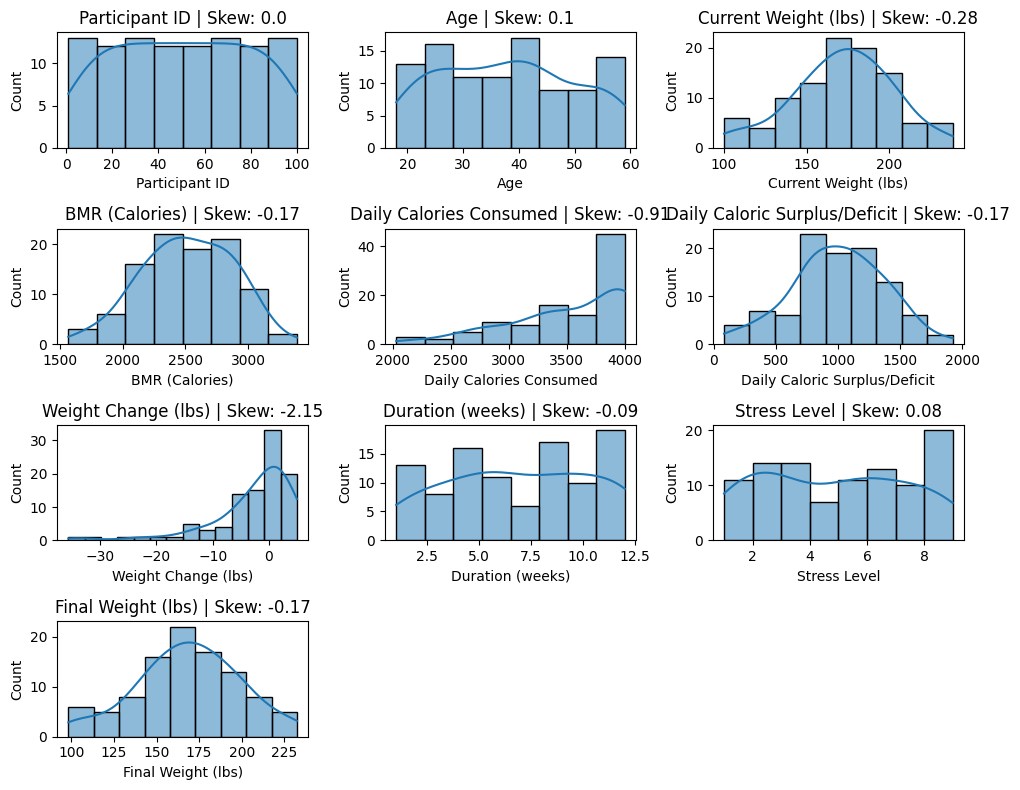

In [41]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = 3
num_rows = (len(numeric_columns) // num_cols) + (1 if len(numeric_columns) % num_cols != 0 else 0)
plt.figure(figsize=(10, num_rows * 2))

for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skew: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

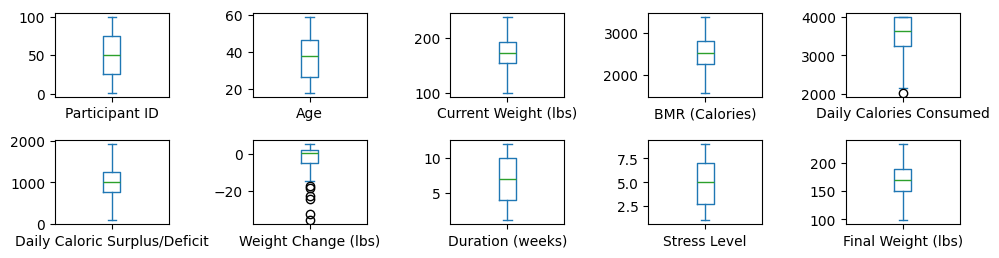

In [42]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

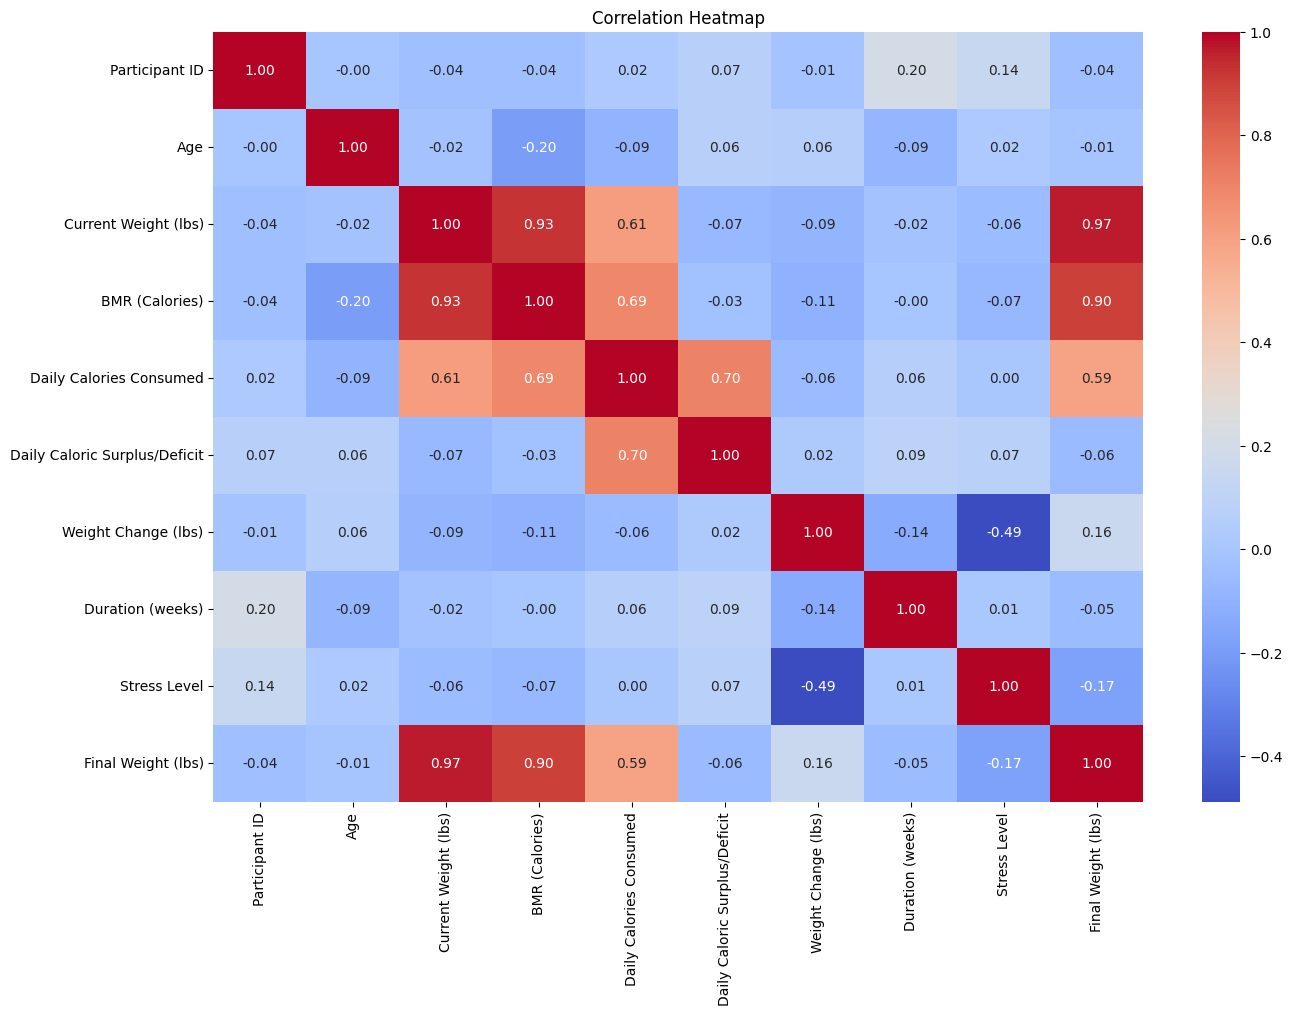

In [43]:
data_numeric = df.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

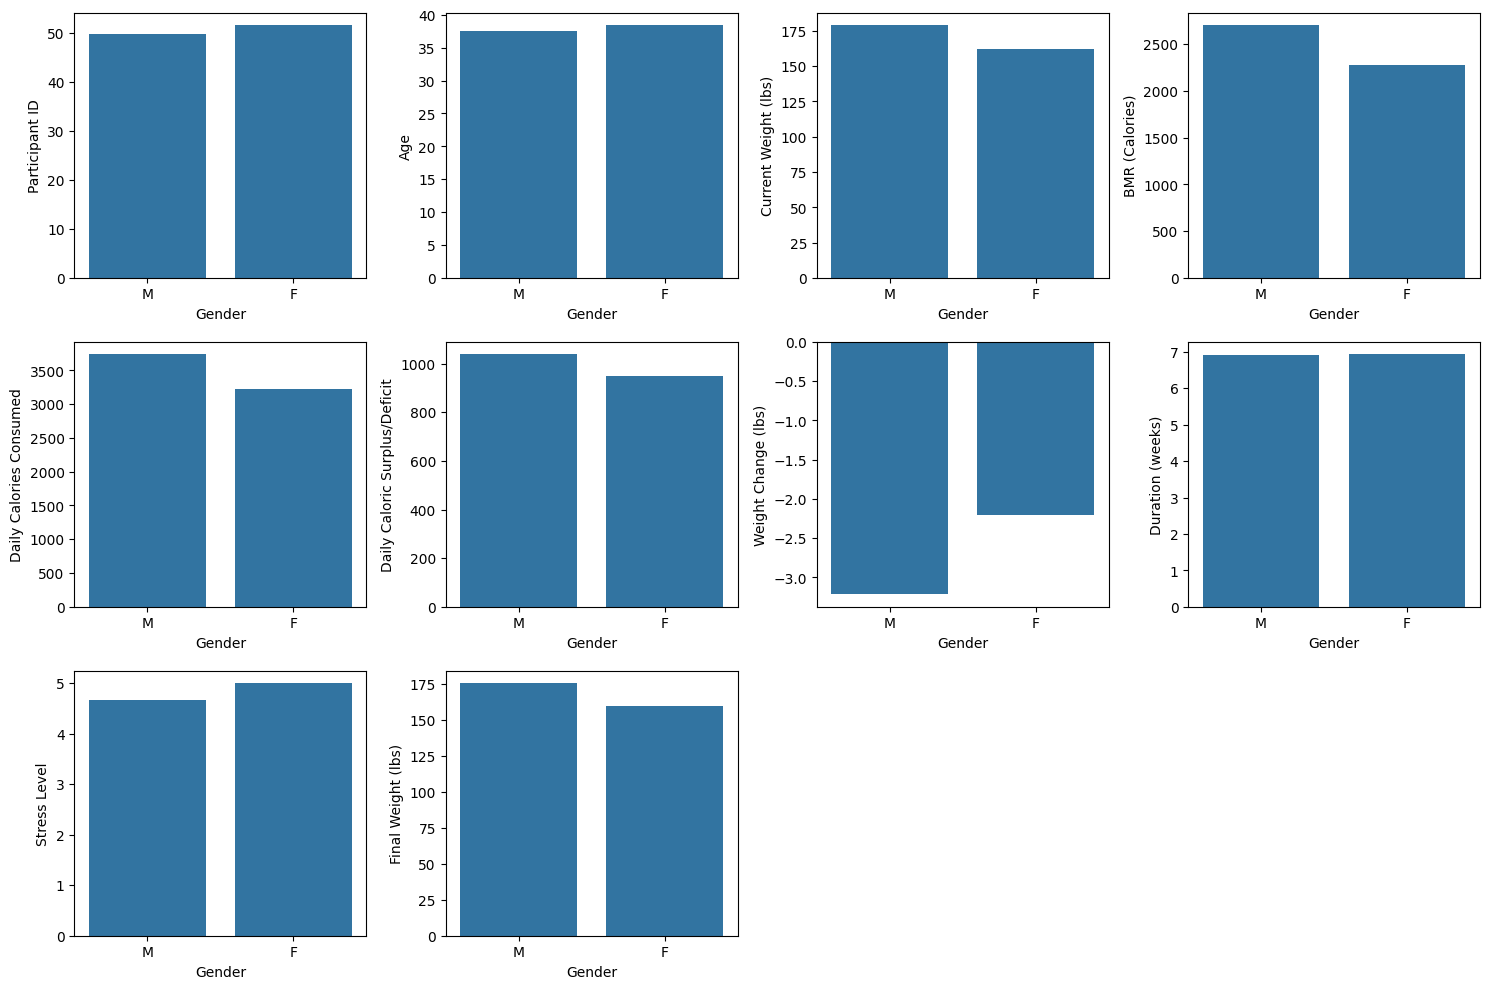

In [44]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Gender', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

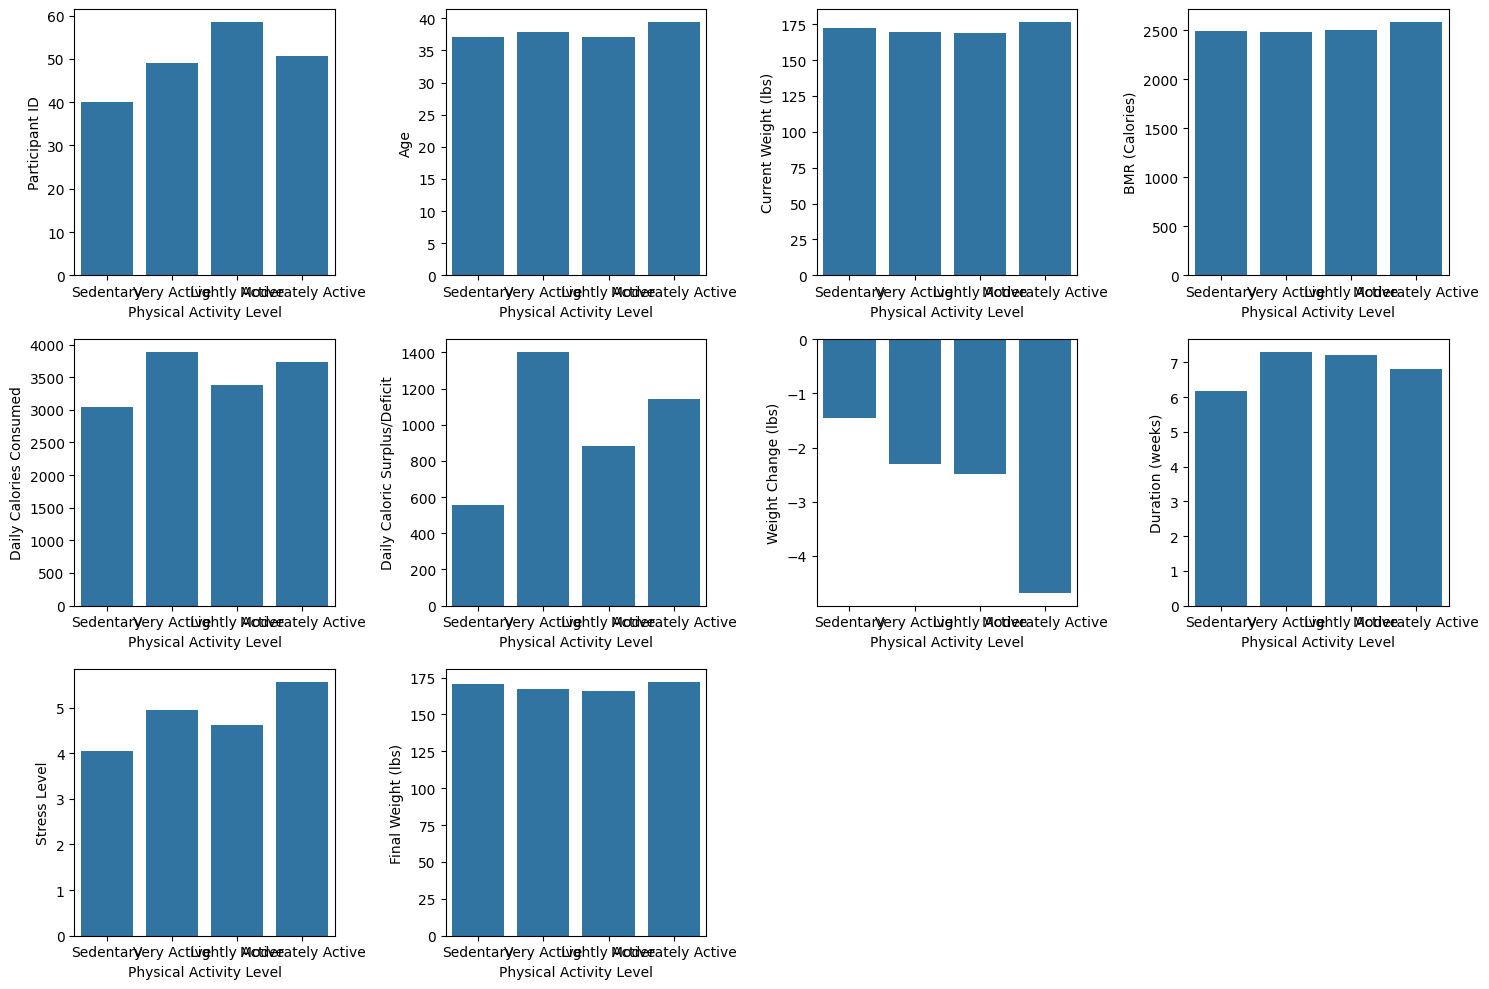

In [45]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Physical Activity Level', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Physical Activity Level')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

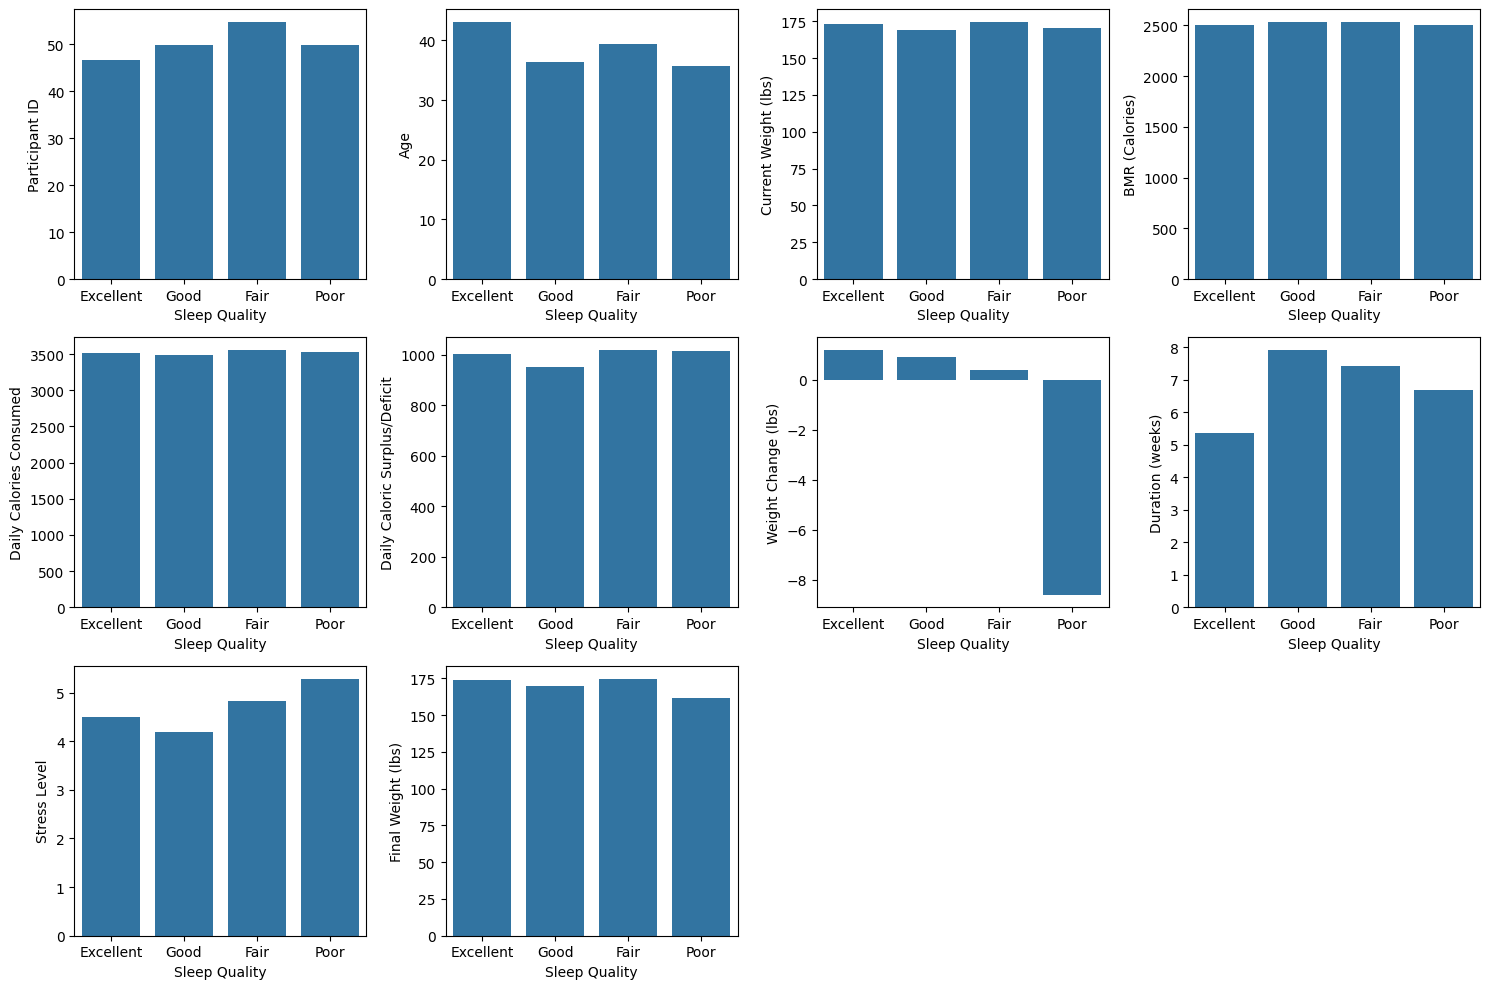

In [46]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Sleep Quality', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Sleep Quality')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Preprocessing

In [47]:
df = df.drop(columns=['Participant ID',
                      'Weight Change (lbs)',
                      'Final Weight (lbs)',
                      'BMR (Calories)',
                      'Age',
                      'Duration (weeks)']).dropna()

In [48]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Gender']
encoders = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

df['Physical Activity Level'] = df['Physical Activity Level'].replace({"Sedentary": 0, "Lightly Active": 1, "Moderately Active": 2, "Very Active": 3})
df['Sleep Quality'] = df['Sleep Quality'].replace({"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3})

In [49]:
# Menentukan batas outlier menggunakan IQR
Q1 = df['Daily Calories Consumed'].quantile(0.25)
Q3 = df['Daily Calories Consumed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan median
df['Daily Calories Consumed'] = df['Daily Calories Consumed'].apply(
    lambda x: df['Daily Calories Consumed'].median() if x < lower_bound or x > upper_bound else x
)

In [50]:
columns = df.columns
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [51]:
df.shape

(100, 7)

In [52]:
df.head()

,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Physical Activity Level,Sleep Quality,Stress Level
0,1.0,0.929088,0.954626,0.397391,0.000000,1.000000,0.625
1,0.0,0.473227,0.904392,0.796196,1.000000,1.000000,0.625
2,0.0,0.309696,0.343920,0.317120,0.000000,0.666667,0.250
3,0.0,0.329233,0.236915,0.175815,0.000000,0.333333,0.125
4,1.0,0.401592,0.628801,0.416576,0.333333,0.666667,0.000


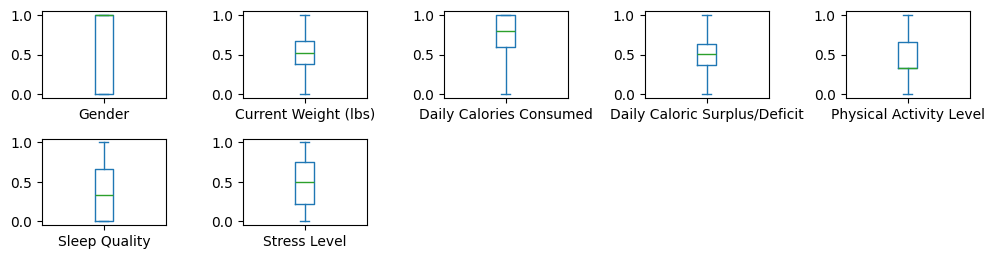

In [53]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Clustering

Text(0.5, 1.0, 'Elbow Method')

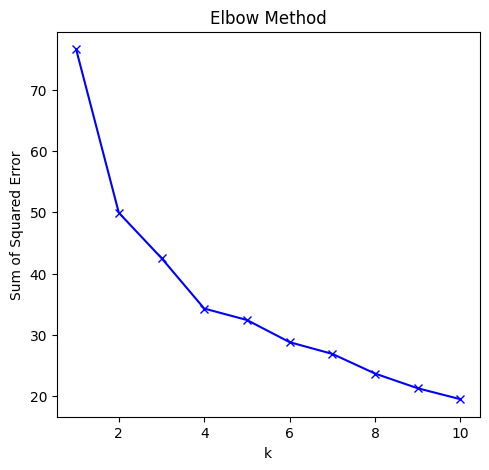

In [54]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')

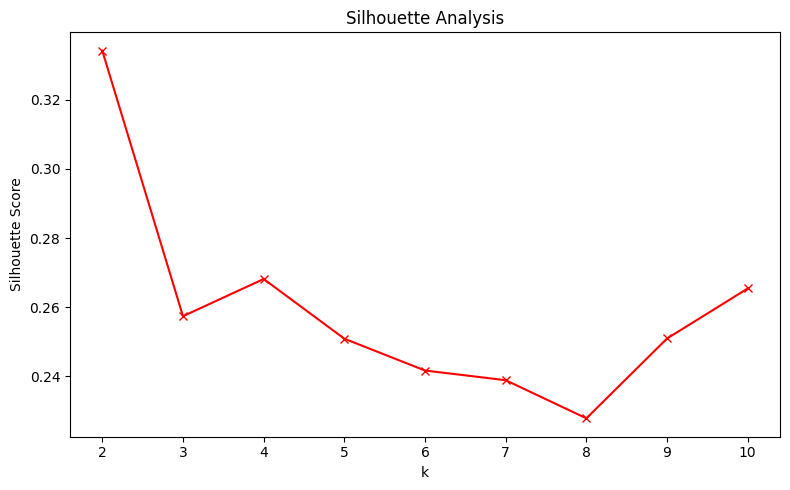

In [55]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

In [56]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

Knowledge Discovery

In [57]:
clusters = df.iloc[:, -1]
data_asli = scaler.inverse_transform(df.iloc[:, :-1])
data_asli = pd.DataFrame(data_asli, columns=df.columns[:-1])
data_asli['Cluster'] = clusters

In [58]:
data_asli.head()

,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Physical Activity Level,Sleep Quality,Stress Level,Cluster
0,1.0,228.4,3916.0,813.7,0.0,3.0,6.0,0
1,0.0,165.4,3823.0,1547.5,3.0,3.0,6.0,1
2,0.0,142.8,2785.4,666.0,0.0,2.0,3.0,1
3,0.0,145.5,2587.3,406.0,0.0,1.0,2.0,1
4,1.0,155.5,3312.8,849.0,1.0,2.0,1.0,0


In [59]:
encoded_values = [0, 1]

for encoded_value in encoded_values:
    original_value = encoders['Gender'].inverse_transform([encoded_value])
    print(original_value)

['F']
['M']


In [60]:
for cluster in sorted(data_asli['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = data_asli[data_asli['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0:
       Gender  Current Weight (lbs)  Daily Calories Consumed  \
count    57.0             57.000000                57.000000   
mean      1.0            178.777193              3736.321053   
std       0.0             29.968335               335.770196   
min       1.0            100.000000              2647.800000   
25%       1.0            162.800000              3451.700000   
50%       1.0            181.900000              3944.200000   
75%       1.0            198.900000              4000.000000   
max       1.0            238.200000              4000.000000   

       Daily Caloric Surplus/Deficit  Physical Activity Level  Sleep Quality  \
count                      57.000000                57.000000      57.000000   
mean                     1037.640351                 1.561404       1.228070   
std                       286.065222                 1.000313       1.102231   
min                       428.500000                 0.000000       0.000000   
25%        

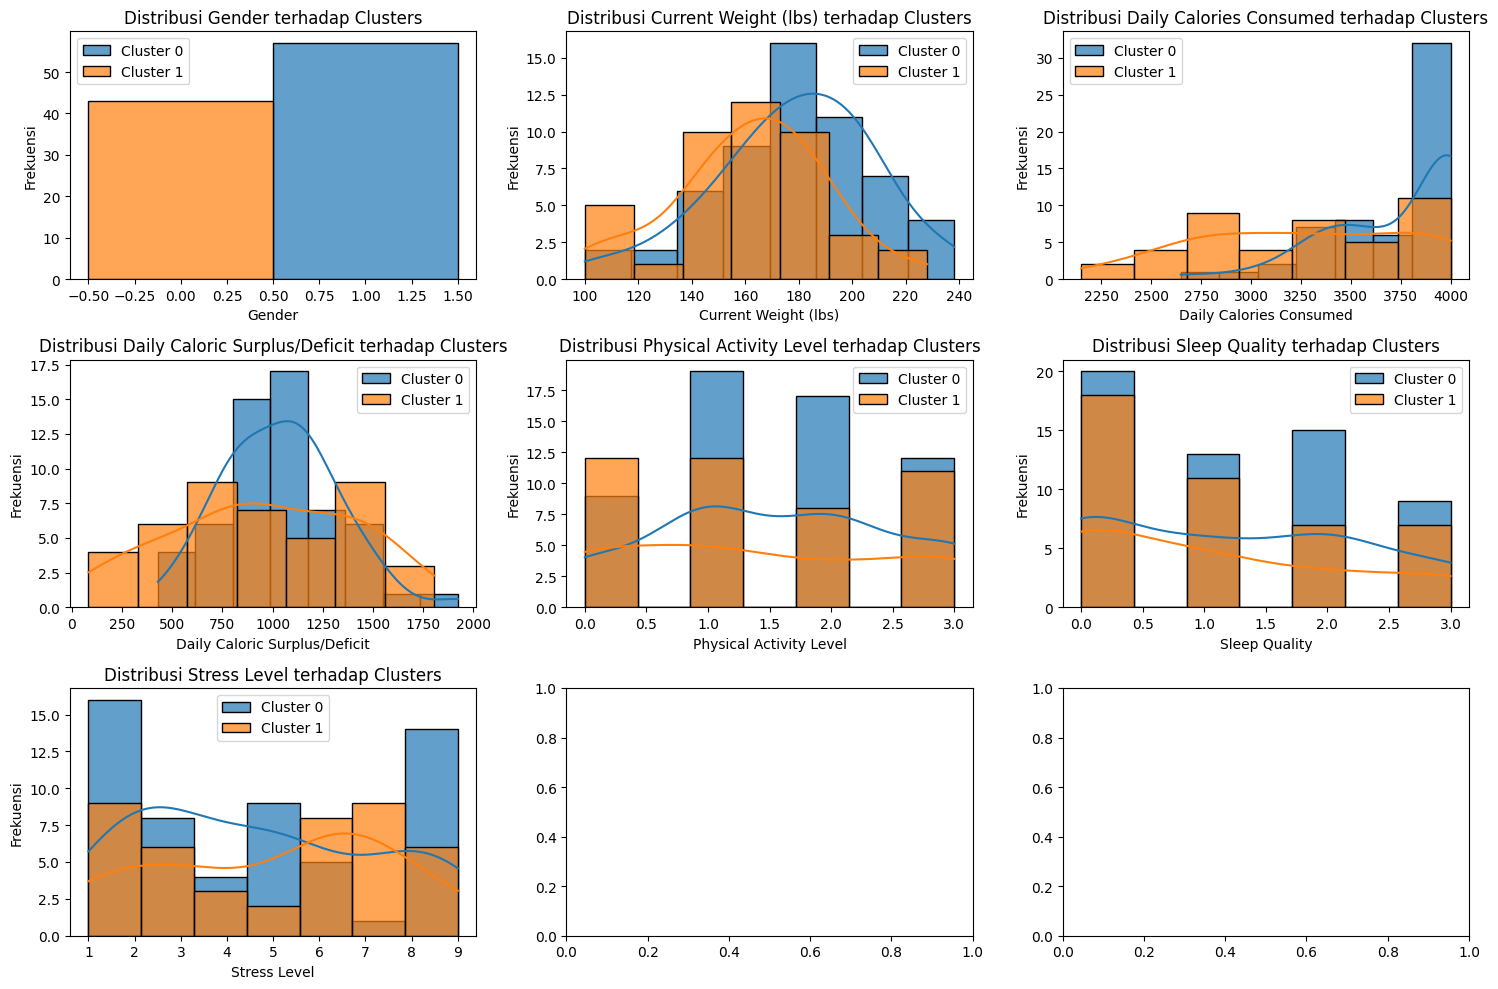

In [61]:
features = data_asli.columns[:-1]
n_rows = 3
n_cols = 3
total_plots = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for cluster in sorted(data_asli['Cluster'].unique()):
        cluster_data = data_asli[data_asli['Cluster'] == cluster]
        sns.histplot(cluster_data[feature], kde=True, label=f'Cluster {cluster}', alpha=0.7, ax=ax)

    ax.set_title(f'Distribusi {feature} terhadap Clusters')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frekuensi')
    ax.legend()

plt.tight_layout()
plt.show()

Simpan Model

In [62]:
with open('model-weight-change.pkl', 'wb') as f:
    pickle.dump({
        'encoder': encoders,
        'scaler': scaler,
        'kmeans': kmeans
    }, f)